<a href="https://colab.research.google.com/github/JuanPoG/Tareas_Multimedia/blob/main/Actividad_7/Actividad_7_PobleteJuan_20521642_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Juan Pablo Poblete</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


In [1]:
!git clone https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git

Cloning into 'EIE_401_MULTIMEDIA'...
remote: Enumerating objects: 314, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 314 (delta 44), reused 63 (delta 14), pack-reused 219
Receiving objects: 100% (314/314), 11.16 MiB | 19.78 MiB/s, done.
Resolving deltas: 100% (138/138), done.


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [ ]:
pip install numpy

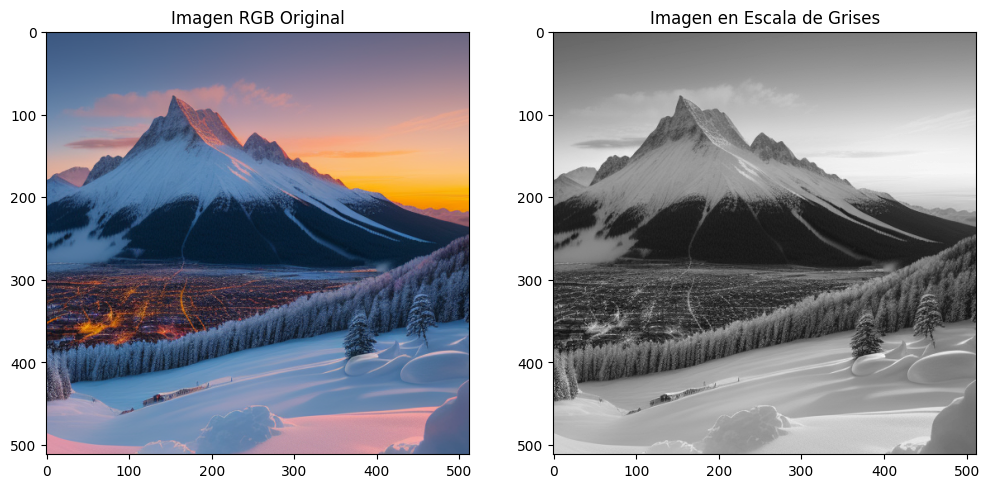

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

def rgb_to_grayscale(image):
    if len(image.shape) == 3 and image.shape[2] == 3:
        r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
        grayscale = 0.299 * r + 0.587 * g + 0.114 * b  # Convierte a escala de grises
        return grayscale
    else:
        raise ValueError("La imagen debe ser una imagen con 3 canales")

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
image = imread(image_path)

# Normaliza la imagen si los valores están en el rango [0, 1]
if image.max() <= 1.0:
    image = (image * 255).astype(np.uint8)

if image is None:
    print("Error al cargar.")
else:
    image_grayscale = rgb_to_grayscale(image)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title("Imagen RGB Original")
    plt.imshow(image)
    plt.subplot(1, 2, 2)
    plt.title("Imagen en Escala de Grises")
    plt.imshow(image_grayscale, cmap='gray')
    plt.show()

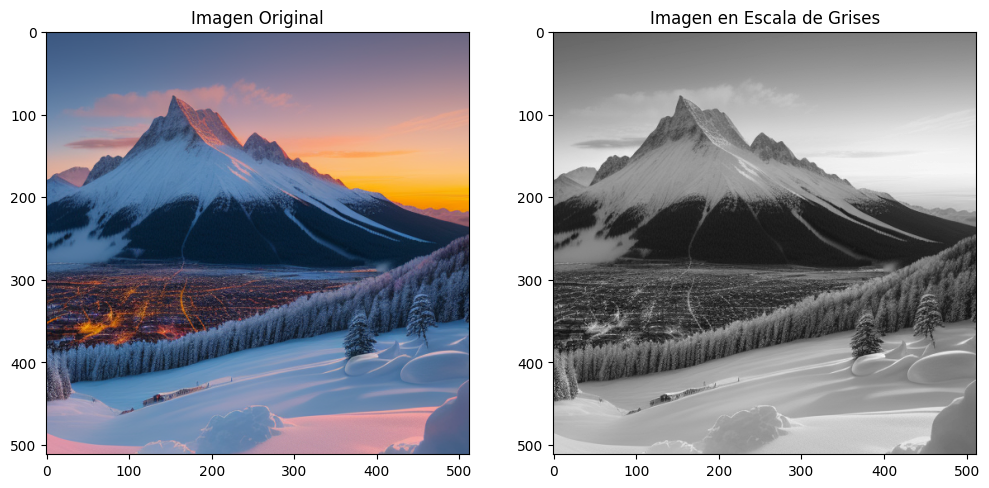

In [5]:
import torch
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imagen = mpimg.imread('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png')


imagen_tensor = torch.tensor(imagen, dtype=torch.float32)# Convierte la imagen a tensor

# normaliza entre 0-1
if imagen_tensor.max() > 1:
    imagen_tensor /= 255.0

# elimina canal alfa
if imagen_tensor.shape[2] == 4:
    imagen_tensor = imagen_tensor[:, :, :3]

# intercambia dimensiones del tensor
imagen_tensor = imagen_tensor.permute(2, 0, 1)

# Convertir a escala de grises
pesos = torch.tensor([0.2989, 0.5870, 0.1140])
imagen_gris = torch.tensordot(imagen_tensor, pesos, dims=([0], [0]))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(imagen_tensor.permute(1, 2, 0).numpy())

plt.subplot(1, 2, 2)
plt.title("Imagen en Escala de Grises")
plt.imshow(imagen_gris.numpy(), cmap='gray')
plt.show()

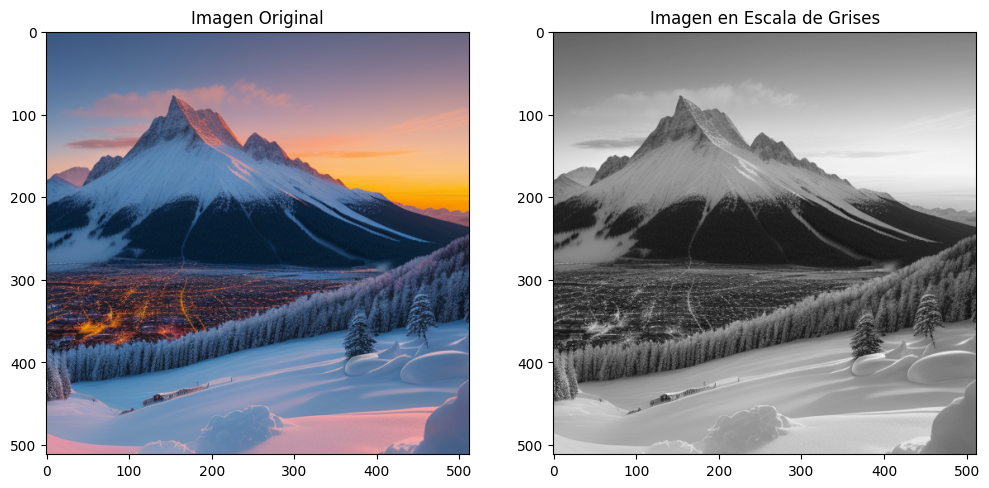

In [7]:
import cv2
import matplotlib.pyplot as plt

imagen_original = cv2.imread('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png')
imagen_gris = cv2.imread('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(cv2.cvtColor(imagen_original, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title("Imagen en Escala de Grises")
plt.imshow(imagen_gris, cmap='gray')
plt.show()

## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

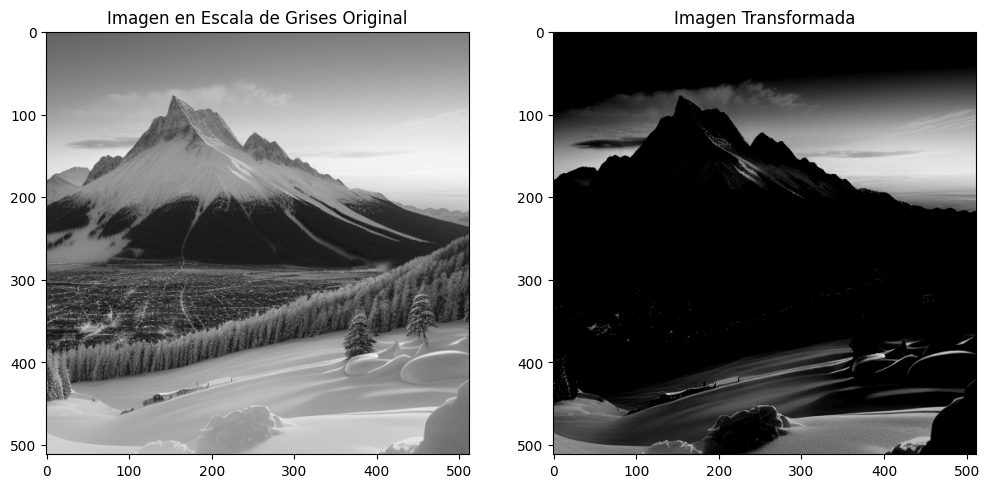

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_threshold(image, threshold, pendiente):
    transformed_image = np.zeros_like(image, dtype=np.float32)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i, j] < threshold:
                transformed_image[i, j] = 0
            else:
                transformed_image[i, j] = pendiente * (image[i, j] - threshold)

    # recorta entre [0, 255]
    transformed_image = np.clip(transformed_image, 0, 255)

    return transformed_image.astype(np.uint8)

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
imagen_gris = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# parámetros de umbral y pendiente
threshold = 128
pendiente = 2

imagen_transformada = apply_threshold(imagen_gris, threshold, pendiente)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen en Escala de Grises Original")
plt.imshow(imagen_gris, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Imagen Transformada")
plt.imshow(imagen_transformada, cmap='gray')
plt.show()

#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



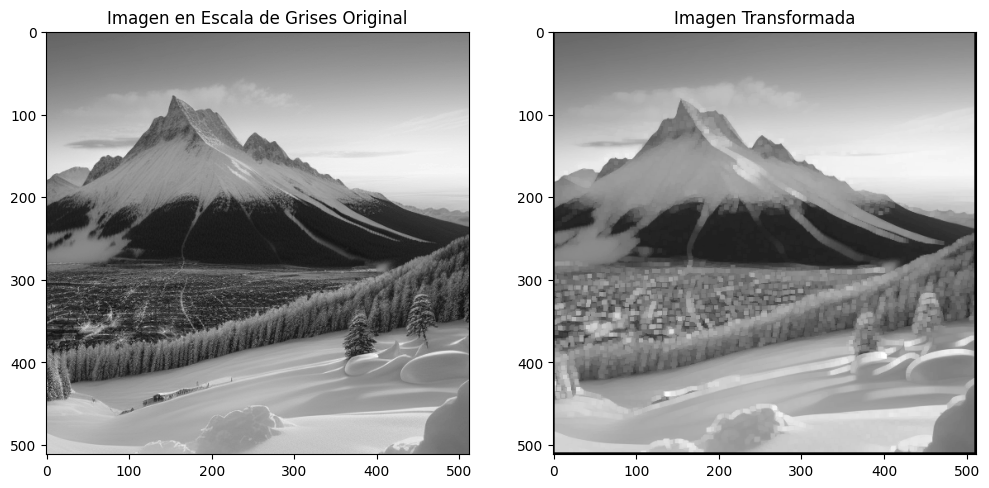

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def max_filter(image, filter_size=5):
    rows, cols = image.shape
    output_image = np.zeros_like(image)
    offset = filter_size // 2

    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            # Extrae la vecindad
            neighborhood = image[i - offset:i + offset + 1, j - offset:j + offset + 1]
            # valor máximo de la vecindad
            output_image[i, j] = np.max(neighborhood)
    return output_image

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
imagen_gris = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

imagen_transformada = max_filter(imagen_gris, filter_size=5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen en Escala de Grises Original")
plt.imshow(imagen_gris, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Imagen Transformada")
plt.imshow(imagen_transformada, cmap='gray')
plt.show()


#### 2.3 Aplica transformación de intensidad
![image.png](attachment:image.png)
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

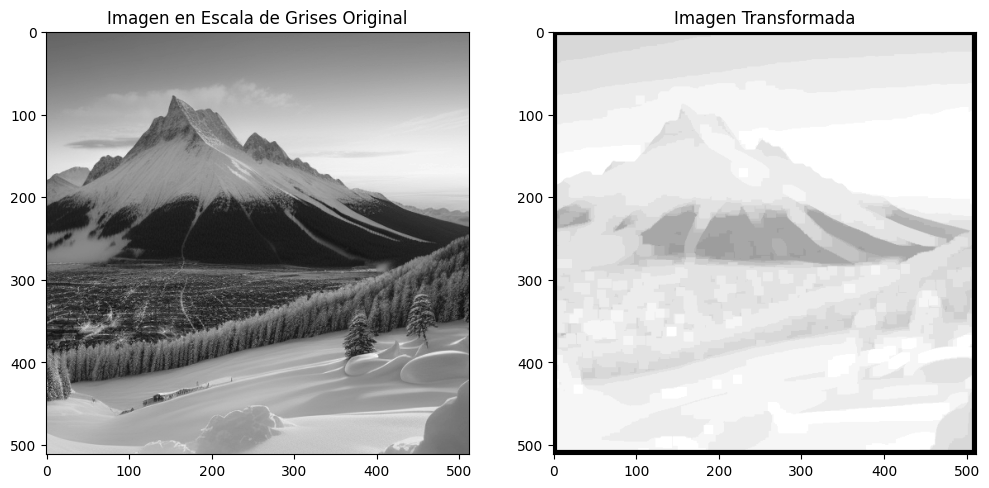

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def log_transform(image, filter_size=10, c=1.0):
    rows, cols = image.shape
    output_image = np.zeros_like(image, dtype=np.float32)
    offset = filter_size // 2
    for i in range(offset, rows - offset):
        for j in range(offset, cols - offset):
            neighborhood = image[i - offset:i + offset + 1, j - offset:j + offset + 1]
            # transformación logarítmica
            log_transformed = c * np.log(1 + neighborhood)
            output_image[i, j] = np.max(log_transformed)

    # normaliza la imagen
    output_image = np.clip(output_image, 0, 255)
    return output_image.astype(np.uint8)

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
imagen_gris = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

c = 5.0
imagen_transformada = log_transform(imagen_gris, filter_size=10, c=c)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagen en Escala de Grises Original")
plt.imshow(imagen_gris, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Imagen Transformada")
plt.imshow(imagen_transformada, cmap='gray')
plt.show()

#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

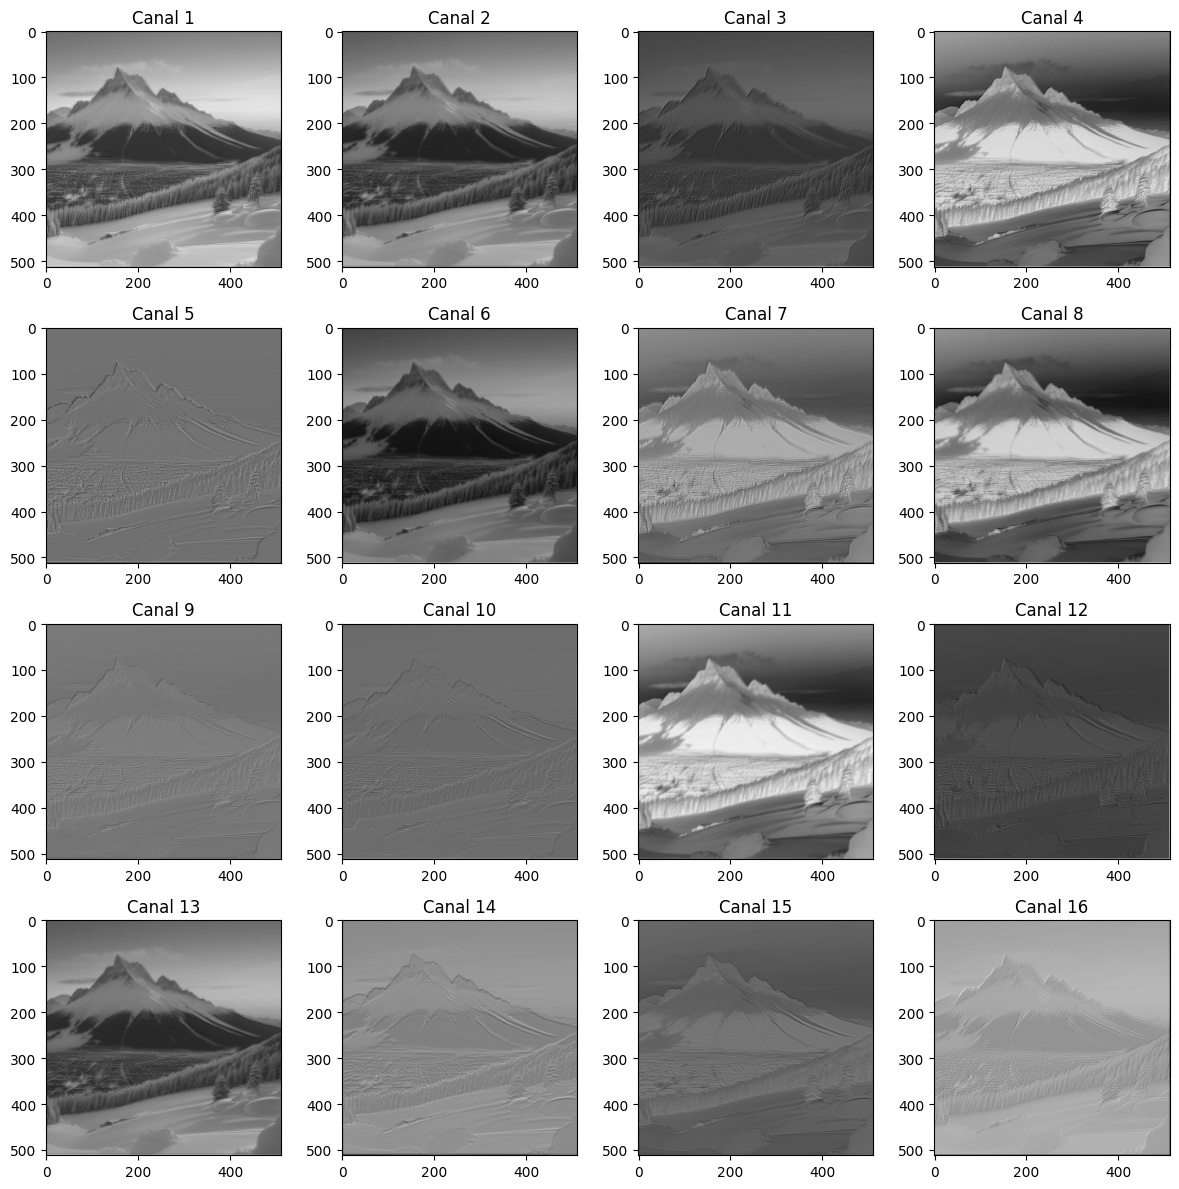

In [11]:
import torch
import torch.nn as nn
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
imagen_gris = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

imagen_tensor = torch.tensor(imagen_gris, dtype=torch.float32).unsqueeze(0).unsqueeze(0) / 255.0

# capas de convolución
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

# convoluciones
output1 = conv1(imagen_tensor)
output2 = conv2(output1)
output3 = conv3(output2)

# transforma los resultados a imágenes
output1_images = output1.detach().numpy().squeeze()
output2_images = output2.detach().numpy().squeeze()
output3_images = output3.detach().numpy().squeeze()

plt.figure(figsize=(12, 12))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(output3_images[i], cmap='gray')
    plt.title(f'Canal {i+1}')
plt.tight_layout()
plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


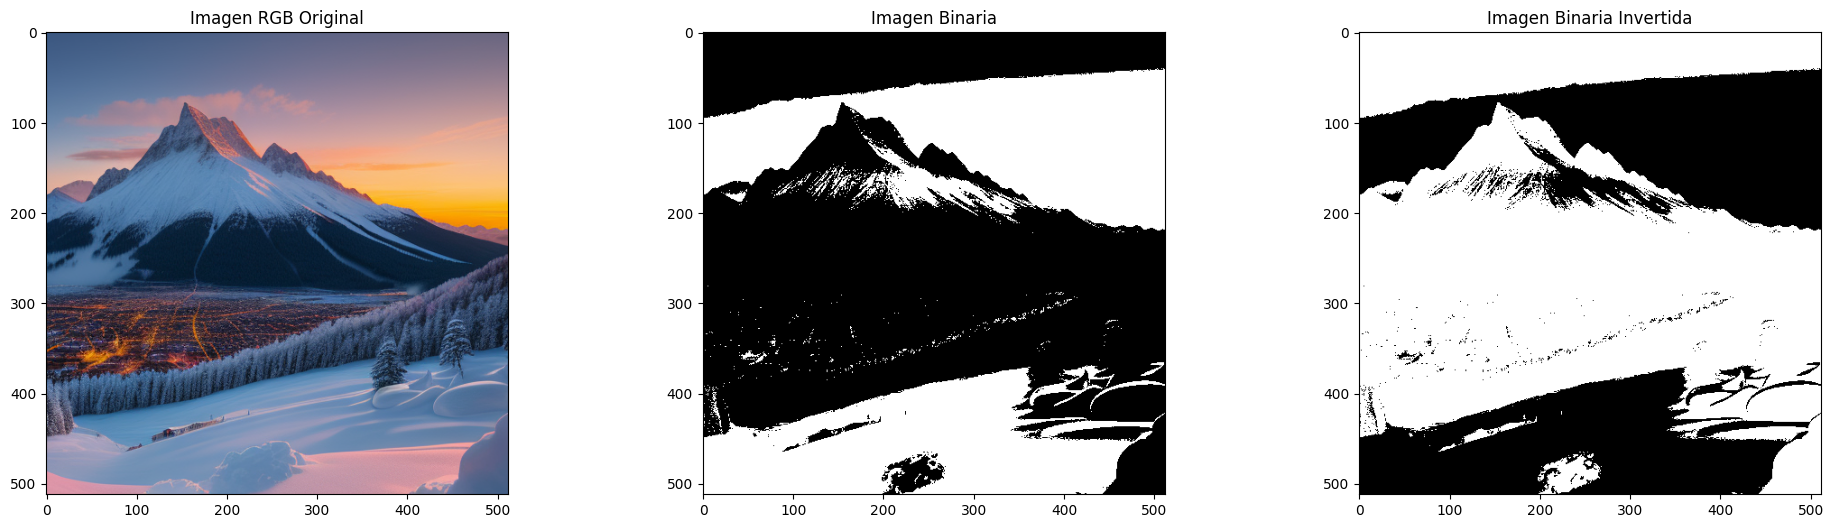

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

def rgb_to_grayscale(image):
    r, g, b = image[:,:,0], image[:,:,1], image[:,:,2]
    grayscale = 0.299 * r + 0.587 * g + 0.114 * b
    return grayscale

def grayscale_to_binary(image, threshold=128):
    binary_image = (image > threshold) * 255
    return binary_image.astype(np.uint8)

def invert_binary_image(image):
    inverted_image = 255 - image
    return inverted_image

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
image = imread(image_path)

if image.max() <= 1.0:
    image = (image * 255).astype(np.uint8)
if image is None:
    print("Error al cargar la imagen.")
else:
    grayscale_image = rgb_to_grayscale(image)
    binary_image = grayscale_to_binary(grayscale_image, threshold=128)
    inverted_binary_image = invert_binary_image(binary_image)

    plt.figure(figsize=(24, 6))
    plt.subplot(1, 3, 1)
    plt.title("Imagen RGB Original")
    plt.imshow(image)
    plt.subplot(1, 3, 2)
    plt.title("Imagen Binaria")
    plt.imshow(binary_image, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Imagen Binaria Invertida")
    plt.imshow(inverted_binary_image, cmap='gray')
    plt.show()

### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



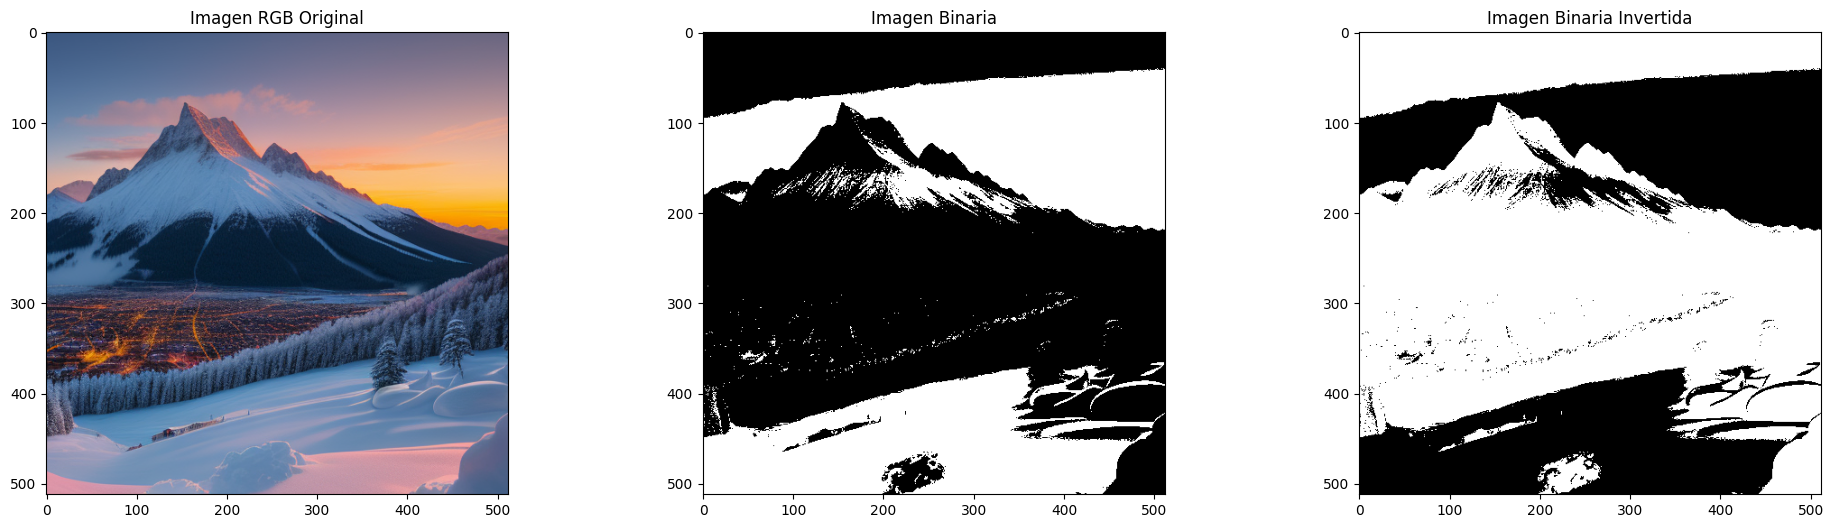

In [16]:
import torch
import matplotlib.pyplot as plt
from matplotlib.image import imread

def rgb_to_grayscale(image):
    r, g, b = image[:, :, 0], image[:, :, 1], image[:, :, 2]
    grayscale = 0.299 * r + 0.587 * g + 0.114 * b
    return grayscale

def grayscale_to_binary(image, threshold=128):
    binary_image = (image > threshold).float() * 255
    return binary_image

def invert_binary_image(image):
    inverted_image = 255 - image
    return inverted_image

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
image = imread(image_path)

if image.max() <= 1.0:
    image = (image * 255).astype('uint8')

# imagen a tensor
image_tensor = torch.tensor(image, dtype=torch.float32)

if image_tensor is None:
    print("Error al cargar la imagen.")
else:
    grayscale_image = rgb_to_grayscale(image_tensor)
    binary_image = grayscale_to_binary(grayscale_image, threshold=128)
    inverted_binary_image = invert_binary_image(binary_image)

    # Convertir los tensores a numpy para visualización
    image_np = image_tensor.numpy().astype('uint8')
    grayscale_image_np = grayscale_image.numpy()
    binary_image_np = binary_image.numpy().astype('uint8')
    inverted_binary_image_np = inverted_binary_image.numpy().astype('uint8')

    plt.figure(figsize=(24, 6))
    plt.subplot(1, 3, 1)
    plt.title("Imagen RGB Original")
    plt.imshow(image_np)
    plt.subplot(1, 3, 2)
    plt.title("Imagen Binaria")
    plt.imshow(binary_image_np, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Imagen Binaria Invertida")
    plt.imshow(inverted_binary_image_np, cmap='gray')
    plt.show()

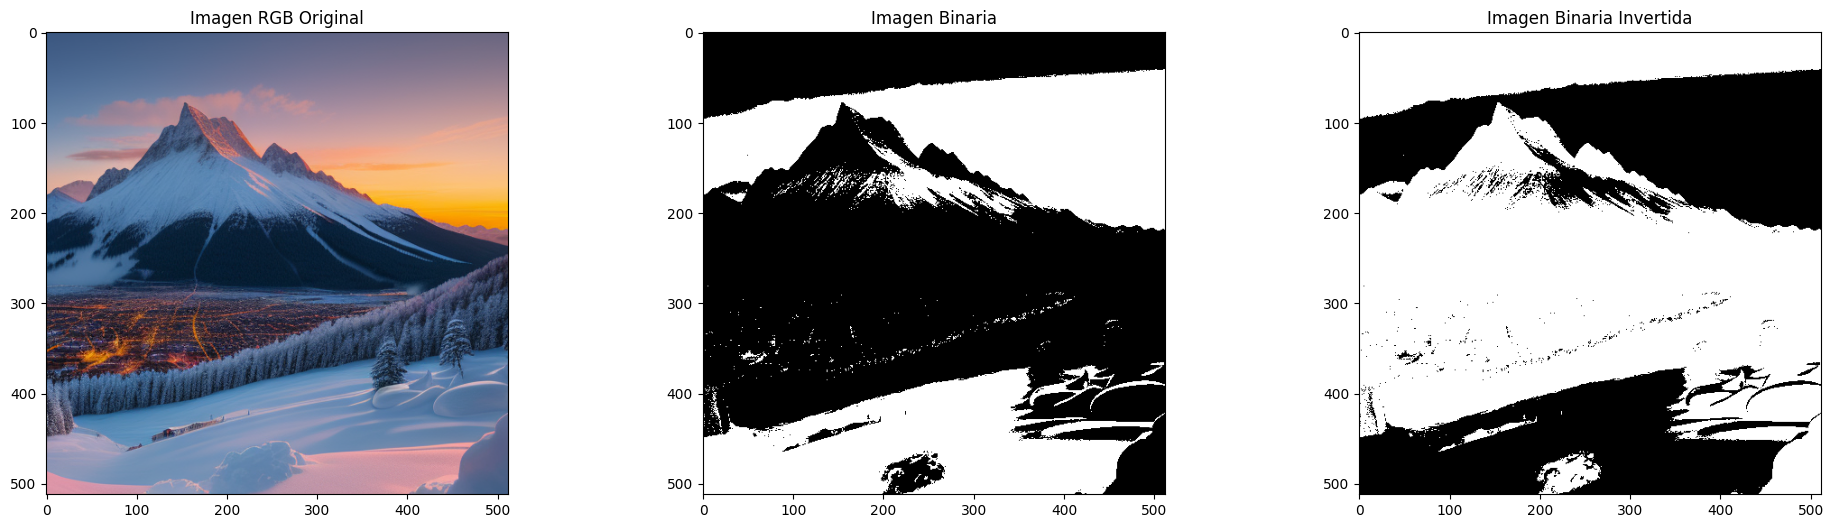

In [19]:
import cv2
import matplotlib.pyplot as plt

def rgb_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def grayscale_to_binary(image, threshold=128):
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary_image

def invert_binary_image(image):
    inverted_image = cv2.bitwise_not(image)
    return inverted_image

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'
image = cv2.imread(image_path)

if image is None:
    print("Error al cargar la imagen.")
else:
    grayscale_image = rgb_to_grayscale(image)
    binary_image = grayscale_to_binary(grayscale_image, threshold=128)
    inverted_binary_image = invert_binary_image(binary_image)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(24, 6))
    plt.subplot(1, 3, 1)
    plt.title("Imagen RGB Original")
    plt.imshow(image_rgb)
    plt.subplot(1, 3, 2)
    plt.title("Imagen Binaria")
    plt.imshow(binary_image, cmap='gray')
    plt.subplot(1, 3, 3)
    plt.title("Imagen Binaria Invertida")
    plt.imshow(inverted_binary_image, cmap='gray')
    plt.show()

## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

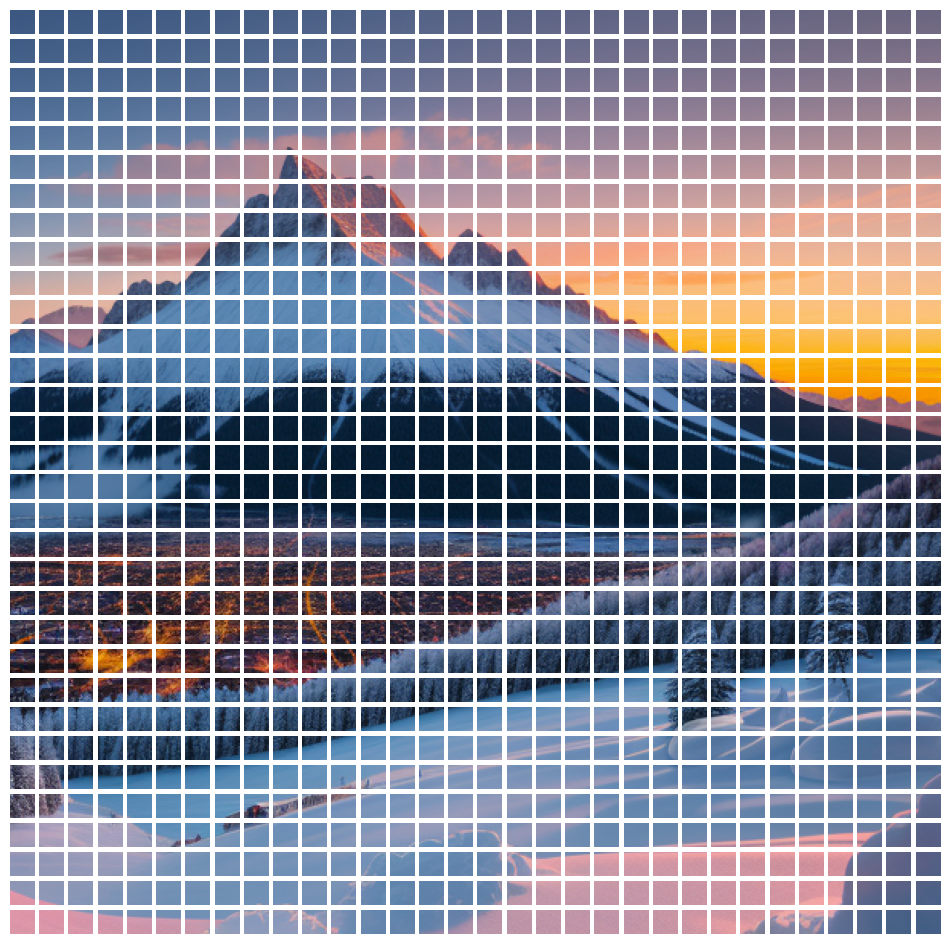

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def split_image_into_patches(image, patch_size=16):
    patches = []
    img_height, img_width, _ = image.shape

    for y in range(0, img_height, patch_size):
        for x in range(0, img_width, patch_size):
            patch = image[y:y+patch_size, x:x+patch_size]
            patches.append(patch)
    return patches

def plot_patches(patches, patch_size=16):
    num_patches = len(patches)
    grid_size = int(np.ceil(np.sqrt(num_patches)))
    plt.figure(figsize=(12, 12))
    for i, patch in enumerate(patches):
        plt.subplot(grid_size, grid_size, i + 1)
        plt.imshow(cv2.cvtColor(patch, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

image_path = '/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png'

if image is None:
    print("Error al cargar la imagen.")
else:
    # divide imagen en parches
    patches = split_image_into_patches(image, patch_size=16)

    # Muestra parches
    plot_patches(patches, patch_size=16)


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
